In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [10]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [15]:
X = X.to_numpy()
y = y.to_numpy()

In [16]:
y.shape

(70000,)

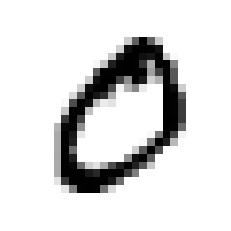

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[1]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [18]:
import numpy as np
y = y.astype(np.uint8)

In [19]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [94]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knc = KNeighborsClassifier()
parameters = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': list(range(5, 10))
}

gs_knc = GridSearchCV(knc, parameters, cv=5, verbose=2, scoring="accuracy")
gs_model = gs_knc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [57]:
knc_aux = KNeighborsClassifier(n_neighbors=5)

In [43]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knc_aux, X_train, y_train, cv=5, scoring='accuracy', verbose=3)
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.969) total time=  28.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.1s remaining:    0.0s


[CV] END ................................ score: (test=0.968) total time=  29.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   57.2s remaining:    0.0s


[CV] END ................................ score: (test=0.968) total time=  33.1s
[CV] END ................................ score: (test=0.967) total time=  30.9s
[CV] END ................................ score: (test=0.970) total time=  27.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.5min finished


0.9685

In [59]:
model = knc_aux.fit(X_train, y_train)

In [60]:
model.score(X_test, y_test)

0.9688

In [61]:
some_digit = X[1]
some_digit_image = some_digit.reshape(28, 28)

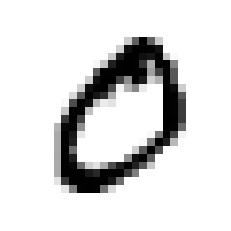

In [62]:
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

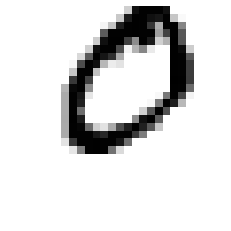

In [73]:
from scipy.ndimage.interpolation import shift
some_digit_image_shifted = shift(some_digit_image, [-5, 1], cval=0)
plt.imshow(some_digit_image_shifted, cmap="binary")
plt.axis("off")
plt.show()

In [86]:
teste = np.array([[1, 2, 3]])

In [90]:
aa = np.concatenate([teste, np.array([[4, 5, 6]])])

In [91]:
np.concatenate((teste, aa), axis=0)

array([[1, 2, 3],
       [1, 2, 3],
       [4, 5, 6]])

In [129]:
y_train_shifted

array([5., 5., 5., ..., 0., 0., 0.])

In [133]:
X_train_shifted = np.empty([X_train.shape[0]*5, X_train.shape[1]])
y_train_shifted = np.empty([y_train.shape[0]*5])
i = 0
for sample, label in zip(X_train, y_train):
    mat = sample.reshape(28, 28)
    X_train_shifted[i] = sample
    y_train_shifted[i] = label
    i += 1
    for v,h in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            shifted = shift(mat, [v, h], cval=0).reshape(1, 784)
            X_train_shifted[i] = shifted
            y_train_shifted[i] = label
            i += 1

In [134]:
model_shifted = knc_aux.fit(X_train_shifted, y_train_shifted)
model_shifted.score(X_test, y_test)

0.9754